4.3 Lyapunov Exponents

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
from tqdm import trange
import scienceplots
plt.style.use("science")

In [14]:
# define the system
# xPrime = sigma * (y-x)
# yPrime = r*x - y - x*z
# zPrime = x*y - b*z

• Use the "cooking recipe" given in the lecture notes (Section 11.5) to calculate Lyapunov exponents. Following this method,
you iterate the discretised equation for the deformation matrix. At each time step you evaluate the Jacobian along your
solution trajectory (x(t), y(t), z(t)). The Lyapunov exponents are obtained from the diagonal elements of the R-matrix using
the QR-decomposition method.

• You may want to use the built-in function "QRDecomposition" in Mathematica. Read the documentation of that function
carefully. In particular, note that (at least in Mathematica Version 13 and below) it returns for a given matrix M the pair
{Q, R}.

In [15]:
# define the Lorenz system
def lorenz_system(state, t, sigma, r, b):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (r - z) - y
    dzdt = x * y - b * z
    return [dxdt, dydt, dzdt]

# define the Lorenz Jacobian
def lorenz_jacobian(state, t, sigma, r, b):
    x, y, z = state
    J = np.array([
        [-sigma, sigma, 0],
        [r - z, -1, -x],
        [y, x, -b]
    ])
    return J

def solveLorenz(initState, sigma, r, b, N, dt):
    # solve the system
    x = odeint(lorenz_system, initState, np.arange(0, N*dt, dt), args=(sigma, r, b))
    return x



def computeLyapunov(initState, sigma, r, b, N, Nstart, dt):

    # 1.) solve the system to get the trajectory
    x = odeint(lorenz_system, initState, np.arange(0, N*dt, dt), args=(sigma, r, b))

    # 2.) init Q, M0 and li
    Q = np.identity(3)
    M0 = np.identity(3)
    li = np.zeros(3)
    li_tracker = np.zeros((N-Nstart, 3))

    Q_old = Q

    # skip the first Nstart steps  

    for n in trange(N):
        
        # skip the first Nstart steps
        if n < Nstart:
            continue

        M_n = np.identity(3) + lorenz_jacobian(x[n], n*dt, sigma, r, b) * dt
        Q, R = np.linalg.qr(np.matmul(M_n, Q_old))
        Q_old = Q

        Rii = np.log(np.abs(np.diag(R)))
        #print(Rii)
        # add the R_ii to li
        li[0] += Rii[0]
        li[1] += Rii[1]
        li[2] += Rii[2]

        # add li to the tracker and normalize
        li_tracker[n-Nstart] = li / (n*dt)

    # Normalize the li
    li /= (N * dt)

    return li, li_tracker

    

b.) 

In [16]:
# set parameters
sigma = 10
b = 8/3
r = 28

# set initial state
initState = [0.01,0.01,0.01]                  # norm of the initial state must be small << 1
tMax = 1000
tStart = 5
dT = 0.001
N = int(tMax / dT)
nStart = int(tStart / dT)

# compute the Lyapunov exponents
LYE_tracker_1 = computeLyapunov(initState, sigma, r, b, N, nStart, dT)
Li = LYE_tracker_1[0]
# sort Li descending
Li = np.sort(Li)[::-1]

# print the Lyapunov exponents
print("Lyapunov exponents:", Li)

100%|██████████| 1000000/1000000 [00:16<00:00, 60934.71it/s]

Lyapunov exponents: [  0.93767625   0.03774462 -14.61028885]


Text(0.5, 1.0, '$\\sigma$ = 10, r = 28, b = 2.667')

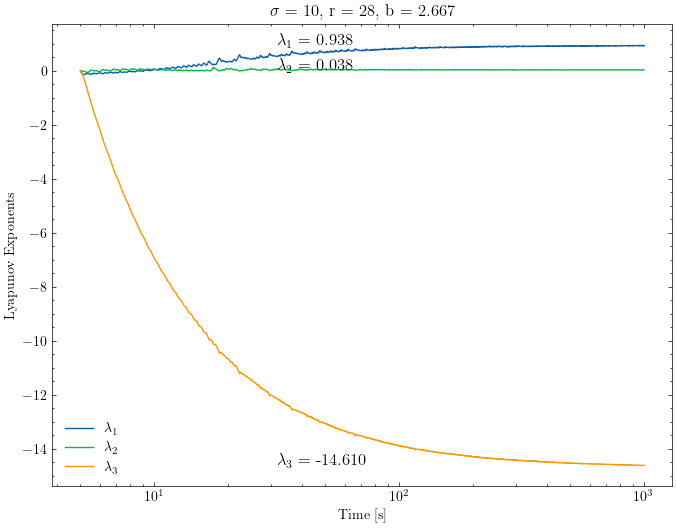

In [17]:
# set parameters
sigma = 10
b = 8/3
r = 28


Li_Tracker_1 = LYE_tracker_1[1]

# time array from nStart/dT to n/dt
time = np.linspace(tStart, tMax, int((tMax-tStart)/dT))

plt.figure(figsize=(8,6))
plt.semilogx(time, Li_Tracker_1[:,0], label="$\lambda_1$")
plt.semilogx(time, Li_Tracker_1[:,1], label="$\lambda_2$")
plt.semilogx(time, Li_Tracker_1[:,2], label="$\lambda_3$")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Lyapunov Exponents")
plt.legend(["$\lambda_1$", "$\lambda_2$", "$\lambda_3$"])

# write final value of the Lyapunov exponents into plot
plt.text(10**1.5, Li_Tracker_1[-1,0], "$\lambda_1$ = {:.3f}".format(Li[0]), fontsize=12)
plt.text(10**1.5, Li_Tracker_1[-1,1], "$\lambda_2$ = {:.3f}".format(Li[1]), fontsize=12)
plt.text(10**1.5, Li_Tracker_1[-1,2], "$\lambda_3$ = {:.3f}".format(Li[2]), fontsize=12)

# plt title with the parameters simga, r and b
plt.title("$\sigma$ = {}, r = {}, b = {:.3f}".format(sigma, r, b))

c.) 

In [18]:
# set parameters
sigma = 10
b = 3
r = 28

# set initial state
initState = [0.01,0.01,0.01]                  # norm of the initial state must be small << 1
tMax = 1000
tStart = 5
dT = 0.001
N = int(tMax / dT)
nStart = int(tStart / dT)

# compute the Lyapunov exponents
LYE_tracker_2 = computeLyapunov(initState, sigma, r, b, N, nStart, dT)
Li = LYE_tracker_2[0]
# sort Li descending
Li_2 = np.sort(Li)[::-1]

# print the Lyapunov exponents
print("Lyapunov exponents:", Li_2)

100%|██████████| 1000000/1000000 [00:16<00:00, 60378.88it/s]

Lyapunov exponents: [  0.9593516    0.04151363 -14.9674755 ]


Text(0.5, 1.0, '$\\sigma$ = 10, r = 28, b = 3')

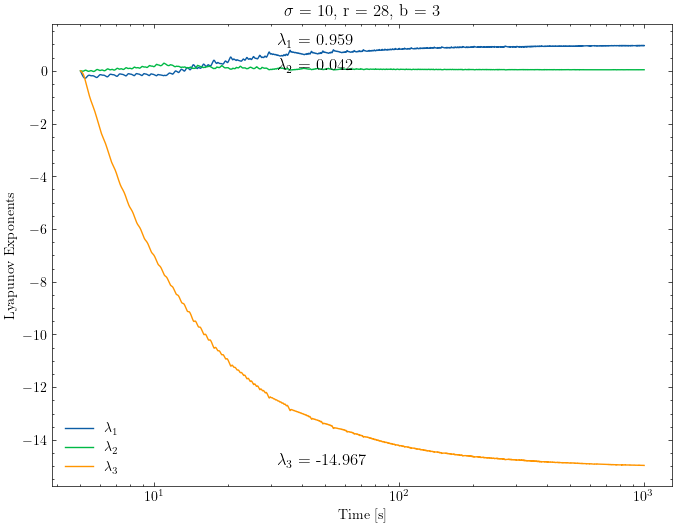

In [19]:
Li_Tracker_2 = LYE_tracker_2[1]

# time array from nStart/dT to n/dt
time = np.linspace(tStart, tMax, int((tMax-tStart)/dT))

plt.figure(figsize=(8,6))
plt.semilogx(time, Li_Tracker_2[:,0], label="$\lambda_1$")
plt.semilogx(time, Li_Tracker_2[:,1], label="$\lambda_2$")
plt.semilogx(time, Li_Tracker_2[:,2], label="$\lambda_3$")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Lyapunov Exponents")
plt.legend(["$\lambda_1$", "$\lambda_2$", "$\lambda_3$"])

# write final value of the Lyapunov exponents into plot
plt.text(10**1.5, Li_Tracker_2[-1,0], "$\lambda_1$ = {:.3f}".format(Li[0]), fontsize=12)
plt.text(10**1.5, Li_Tracker_2[-1,1], "$\lambda_2$ = {:.3f}".format(Li[1]), fontsize=12)
plt.text(10**1.5, Li_Tracker_2[-1,2], "$\lambda_3$ = {:.3f}".format(Li[2]), fontsize=12)

# plt title with the parameters simga, r and b
plt.title("$\sigma$ = {}, r = {}, b = {}".format(sigma, r, b))

e.)

In [20]:
# set parameters
sigma = 16
b = 5
r = 320

# set initial state
initState = [0.01,0.01,0.01]                  # norm of the initial state must be small << 1
tMax = 100
tStart = 5
dT = 0.0001
N = int(tMax / dT)
nStart = int(tStart / dT)

# compute the Lyapunov exponents
LYE_tracker_3 = computeLyapunov(initState, sigma, r, b, N, nStart, dT)
Li = LYE_tracker_3[0]
# sort Li descending
Li_3 = np.sort(Li)[::-1]

# print the Lyapunov exponents
print("Lyapunov exponents:", Li_3)

100%|██████████| 1000000/1000000 [00:16<00:00, 61380.77it/s]

Lyapunov exponents: [  0.10460111  -6.48301999 -14.41866396]


Text(0.5, 1.0, '$\\sigma$ = 16, r = 320, b = 5')

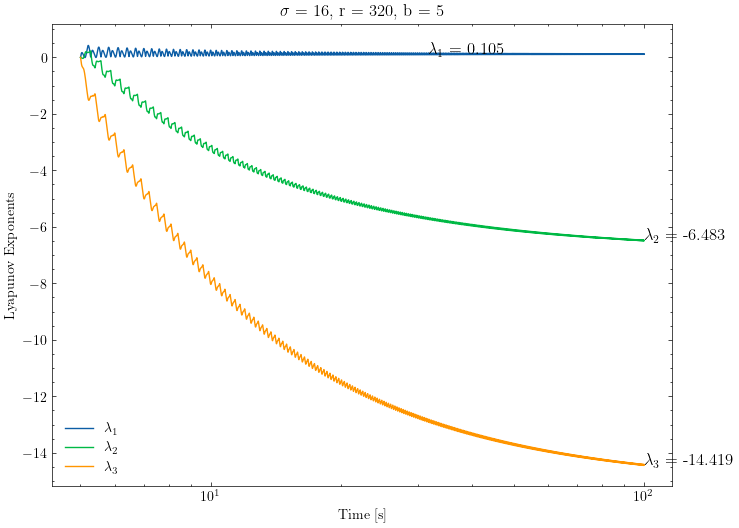

In [21]:
Li_Tracker_3 = LYE_tracker_3[1]

# time array from nStart/dT to n/dt
time = np.linspace(tStart, tMax, int((tMax-tStart)/dT))

plt.figure(figsize=(8,6))
plt.semilogx(time, Li_Tracker_3[:,0], label="$\lambda_1$")
plt.semilogx(time, Li_Tracker_3[:,1], label="$\lambda_2$")
plt.semilogx(time, Li_Tracker_3[:,2], label="$\lambda_3$")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Lyapunov Exponents")
plt.legend(["$\lambda_1$", "$\lambda_2$", "$\lambda_3$"])

# write final value of the Lyapunov exponents into plot
plt.text(10**1.5, Li_Tracker_3[-1,0], "$\lambda_1$ = {:.3f}".format(Li[0]), fontsize=12)
plt.text(10**2, Li_Tracker_3[-1,1], "$\lambda_2$ = {:.3f}".format(Li[1]), fontsize=12)
plt.text(10**2, Li_Tracker_3[-1,2], "$\lambda_3$ = {:.3f}".format(Li[2]), fontsize=12)

# plt title with the parameters simga, r and b
plt.title("$\sigma$ = {}, r = {}, b = {}".format(sigma, r, b))

plot the lorenz system for e.)

Text(0.5, 0, '$z$')

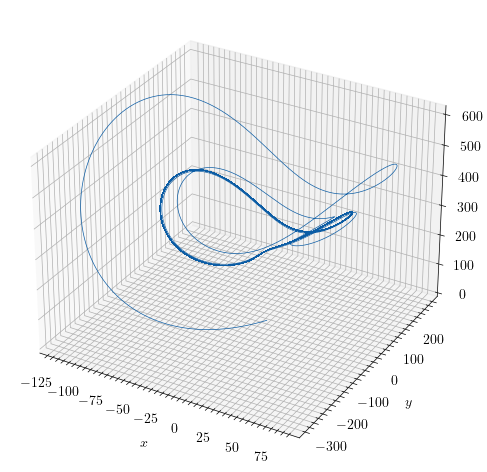

In [22]:
# set parameters
sigma = 16
b = 5
r = 320
N = 1000000
initState = np.array([0.01,0.01,0.01])               # norm of the initial state must be small << 1
initState *= -1
# plot the solved trajectory in phasespace in 3D
x_solution = solveLorenz(initState, sigma, r, b, N, dT)

# time array from nStart/dT to n/dt
time = np.linspace(0, tMax, int((tMax)/dT))

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_solution[:, 0], x_solution[:, 1], x_solution[:, 2], lw=0.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

